In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# !pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 215 kB 4.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### The dataset choosen is Breast Cancer Wisconsin (Diagnostic) Data Set Taken from the UCI machine Learning Repository

#### Link for the datset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)
#### Description for the dataSet [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


#### Adding the relevant column names 

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns_names =  [ 'ID_number' , 'diagnosis' , 'radius' , 'texture' , 'perimeter' , 'area' , 'smoothness' , 'compactness' , 'concavity' , 'concave_points' , 'symmetry' , 'fractal_dimension', 'radius_se' , 'texture_se' , 'perimeter_se' , 'area_se' , 'smoothness_se' , 'compactness_se' , 'concavity_se' , 'concave_points_se' , 'symmetry_se' , 'fractal_dimension_se', 'radius_worst' , 'texture_worst' , 'perimeter_worst' , 'area_worst' , 'smoothness_worst' , 'compactness_worst' , 'concavity_worst' , 'concave_points_worst' , 'symmetry_worst' , 'fractal_dimension_worst']
df.columns = columns_names
df.head()

,ID_number,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [58]:
def data_description(url , columns_names ):
    data_scale = []
    data_value = []
    df = pd.read_csv(url)
    df.columns = columns_names
    number_of_entries = df.shape[0]
    number_of_attributes = df.shape[1]
    print("This dataset contains " + str(number_of_entries) + ", each with " + str(number_of_attributes) + " attributes")
    for i,column in enumerate(columns_names):
        if ( len(df[column].unique()) < 8 ):
            if ( df[column].dtype == 'O' ) :
                print(str(i)+" " + str(column) + " : "  + "nominal, discrete")
                data_scale.append('nominal')
                data_value.append('discrete')
            if ( df[column].dtype == 'int64' ):
                print(str(i)+" " + str(column) + " : "  + "ordinal, discrete")
                data_scale.append('ordinal')
                data_value.append('discrete')
        if ( df[column].dtype == 'float64' ):
            print(str(i)+" " + str(column) + " : "  + "ratio, continuous")
            data_scale.append('ratio')
            data_value.append('continuous')
        if ( df[column].dtype == 'int64' ):
            print(str(i)+" " + str(column) + " : "  + "ratio, discrete")
            data_scale.append('ratio')
            data_value.append('discrete')
                
    return data_scale, data_value, df
        
    
  


In [60]:
_ , _ , _ = data_description(url,columns_names)

This dataset contains 568, each with 32 attributes
0 ID_number : ratio, discrete
1 diagnosis : nominal, discrete
2 radius : ratio, continuous
3 texture : ratio, continuous
4 perimeter : ratio, continuous
5 area : ratio, continuous
6 smoothness : ratio, continuous
7 compactness : ratio, continuous
8 concavity : ratio, continuous
9 concave_points : ratio, continuous
10 symmetry : ratio, continuous
11 fractal_dimension : ratio, continuous
12 radius_se : ratio, continuous
13 texture_se : ratio, continuous
14 perimeter_se : ratio, continuous
15 area_se : ratio, continuous
16 smoothness_se : ratio, continuous
17 compactness_se : ratio, continuous
18 concavity_se : ratio, continuous
19 concave_points_se : ratio, continuous
20 symmetry_se : ratio, continuous
21 fractal_dimension_se : ratio, continuous
22 radius_worst : ratio, continuous
23 texture_worst : ratio, continuous
24 perimeter_worst : ratio, continuous
25 area_worst : ratio, continuous
26 smoothness_worst : ratio, continuous
27 compac

In [67]:
def stats(url , columns_names):
    df = pd.read_csv(url)
    df.columns = columns_names
    for column in columns_names :
        print("------------------------" + str(column) + "------------------------\n")
        print(df[column].describe(),"\n")
    

In [68]:
stats(url , columns_names)

------------------------ID_number------------------------

count    5.680000e+02
mean     3.042382e+07
std      1.251246e+08
min      8.670000e+03
25%      8.692225e+05
50%      9.061570e+05
75%      8.825022e+06
max      9.113205e+08
Name: ID_number, dtype: float64 

------------------------diagnosis------------------------

count     568
unique      2
top         B
freq      357
Name: diagnosis, dtype: object 

------------------------radius------------------------

count    568.000000
mean      14.120491
std        3.523416
min        6.981000
25%       11.697500
50%       13.355000
75%       15.780000
max       28.110000
Name: radius, dtype: float64 

------------------------texture------------------------

count    568.000000
mean      19.305335
std        4.288506
min        9.710000
25%       16.177500
50%       18.855000
75%       21.802500
max       39.280000
Name: texture, dtype: float64 

------------------------perimeter------------------------

count    568.000000
mean    

### 4. Can we use a box plot for visualizing ordinal data ? (Yes/No). Explain why.
![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)

### Answer 

#### Yes , since boxplot gives a representation of 25th,75th percentile, median and outliers which is possible for ordinal data 
#### but box plot for ordinal data does not provide much statistical inference since, there is not much spread in the ordinal data as the values are predefined.

- Boxplots are an easy visual way to depict quartiles in data.
- Boxplots allow us a simple way to compare groups and view dispersion and spread in data
- They also help highlight outliers
- Ordinal data is a kind of categorical data with a set order or scale to it




#### Below is an example of boxplot representation of current dataset 
here B corresponds to bening and M corresponds malignant tumour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcccc1f0b8>,
      dtype=object)

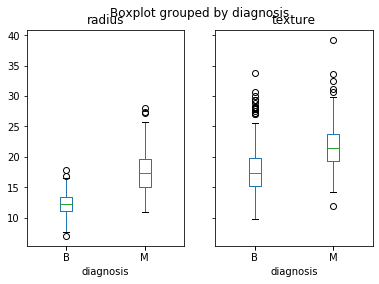

In [75]:
df.boxplot(by='diagnosis' , column=['radius', 'texture'], grid=False)

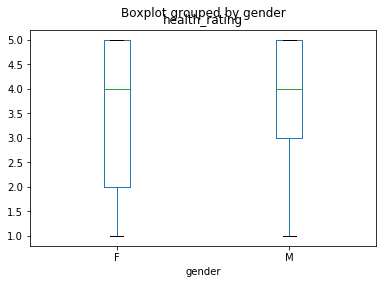

In [77]:
test = pd.read_csv('./A2_example_dataset - students_demo.csv')
test.boxplot(by='gender' , column=['health_rating'], grid=False)

In [81]:
def visualize_data(url , columns_names):
    data_scale, data_value, df = data_description( url , columns_names )
    for i , column in enumerate(columns_names):
        if data_scale[i] == 'nominal' and data_value[i] == 'discrete':
            plt.figure(i)
            sns.countplot( x = column , data=df)
        if ( data_scale[i] == 'ratio' and ( data_value[i] == 'discrete' or data_value[i] == 'continuous' ) ):
            plt.figure(i)
            sns.distplot(df[column])
    return

This dataset contains 568, each with 32 attributes
0 ID_number : ratio, discrete
1 diagnosis : nominal, discrete
2 radius : ratio, continuous
3 texture : ratio, continuous
4 perimeter : ratio, continuous
5 area : ratio, continuous
6 smoothness : ratio, continuous
7 compactness : ratio, continuous
8 concavity : ratio, continuous
9 concave_points : ratio, continuous
10 symmetry : ratio, continuous
11 fractal_dimension : ratio, continuous
12 radius_se : ratio, continuous
13 texture_se : ratio, continuous
14 perimeter_se : ratio, continuous
15 area_se : ratio, continuous
16 smoothness_se : ratio, continuous
17 compactness_se : ratio, continuous
18 concavity_se : ratio, continuous
19 concave_points_se : ratio, continuous
20 symmetry_se : ratio, continuous
21 fractal_dimension_se : ratio, continuous
22 radius_worst : ratio, continuous
23 texture_worst : ratio, continuous
24 perimeter_worst : ratio, continuous
25 area_worst : ratio, continuous
26 smoothness_worst : ratio, continuous
27 compac

/home/prince-sharma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/prince-sharma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/prince-sharma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

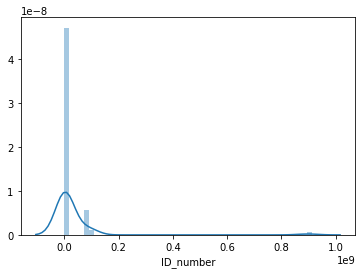

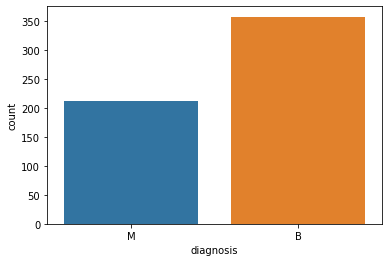

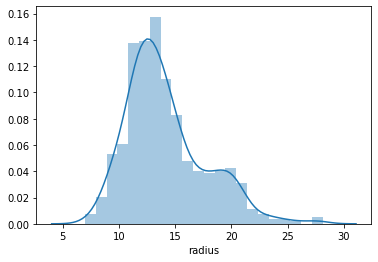

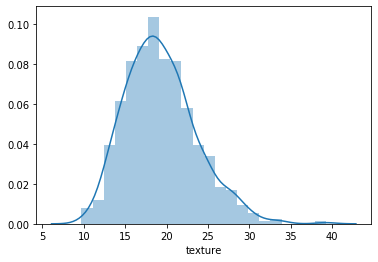

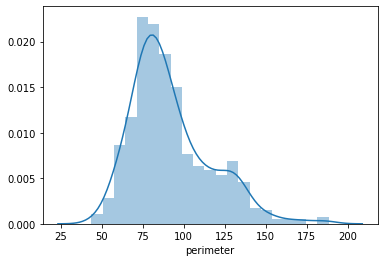

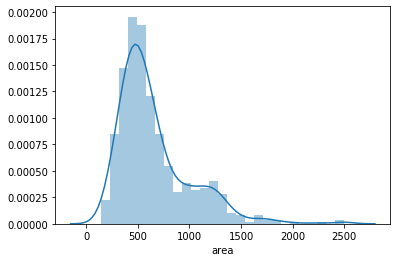

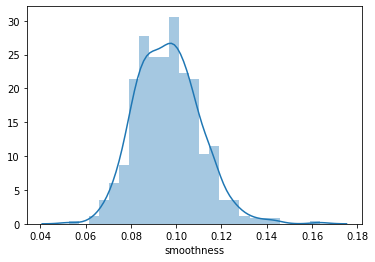

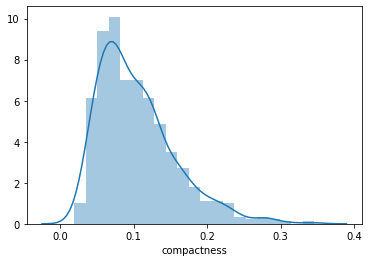

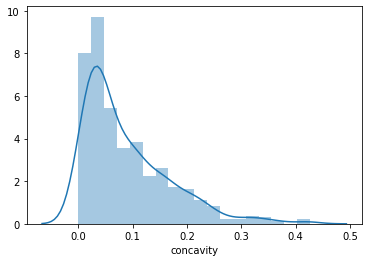

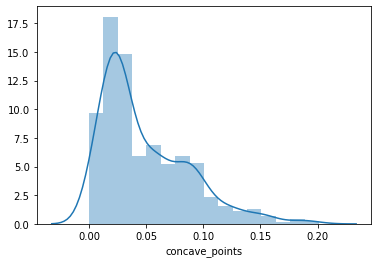

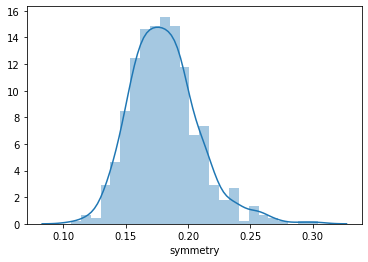

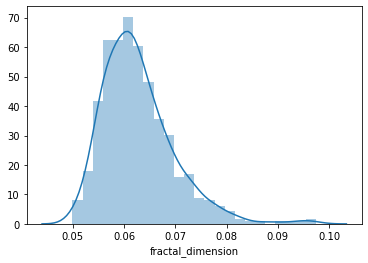

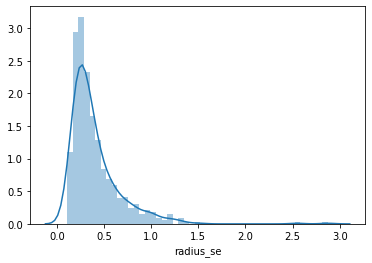

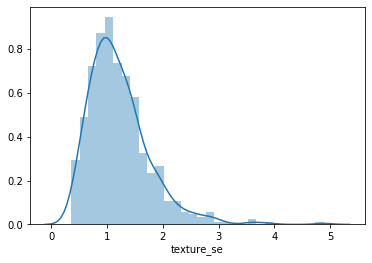

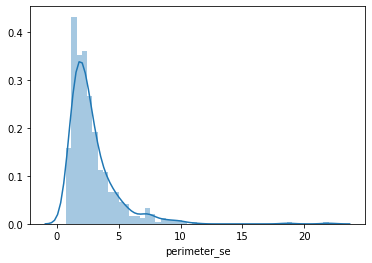

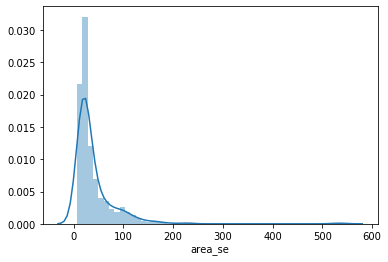

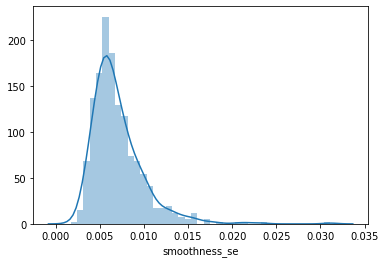

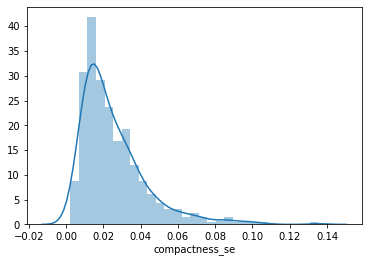

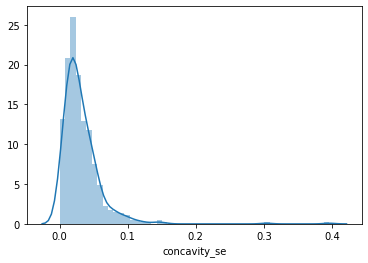

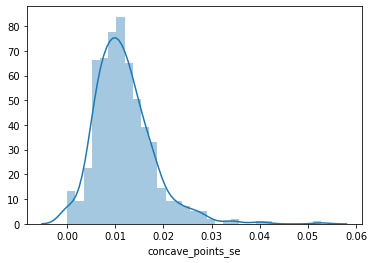

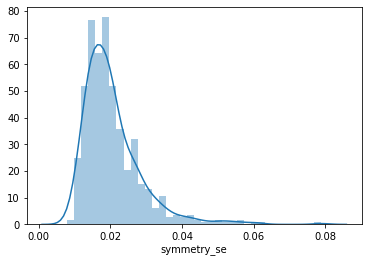

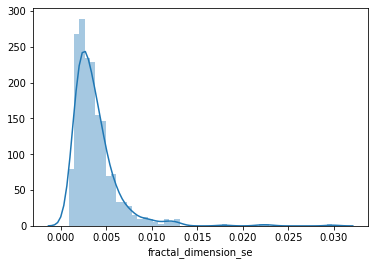

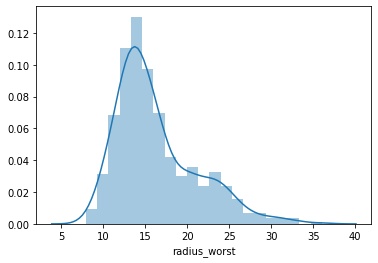

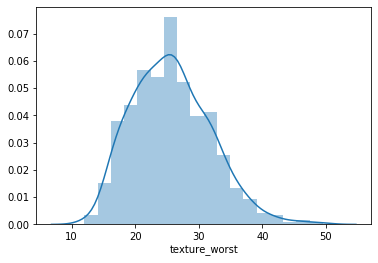

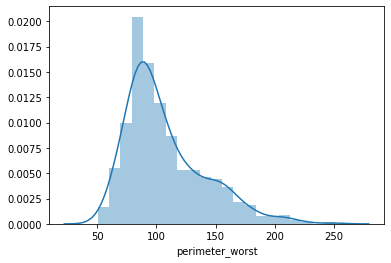

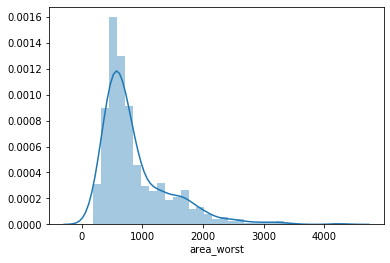

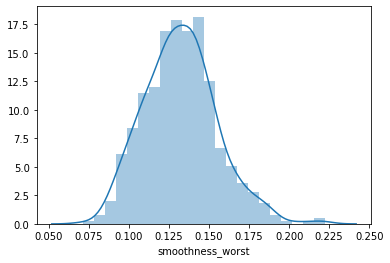

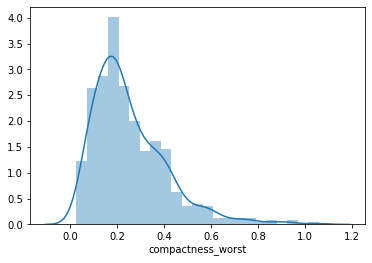

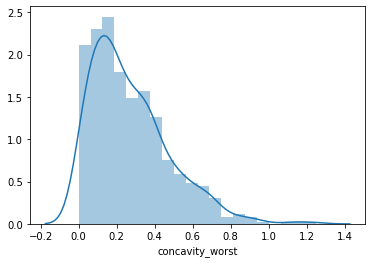

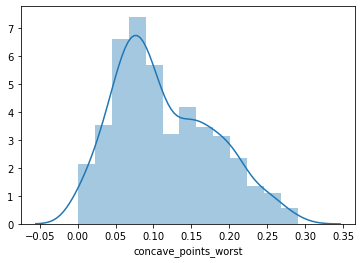

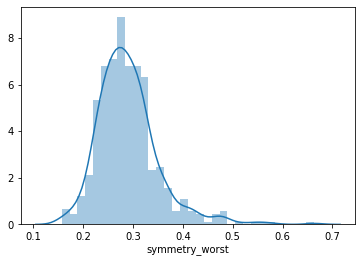

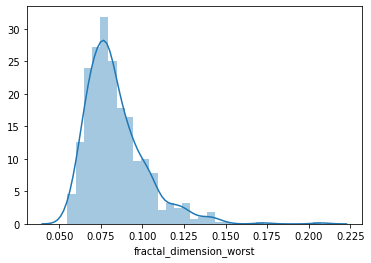

In [86]:
visualize_data( url , columns_names )

In [22]:
df['diagnosis'].describe().unique()
df['radius'].describe()

count    568.000000
mean      14.120491
std        3.523416
min        6.981000
25%       11.697500
50%       13.355000
75%       15.780000
max       28.110000
Name: radius, dtype: float64

In [28]:
list(df['radius'].describe())

[568.0,
 14.1204911971831,
 3.5234162139180856,
 6.981,
 11.697499999999998,
 13.355,
 15.78,
 28.11]

In [55]:
df['radius'].unique().dtype

dtype('float64')